**D1DAE: Análise Estatística para Ciência de Dados** <br/>
IFSP Campinas

Prof. Dr. Samuel Martins <br/><br/>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

In [1]:
# pacotes usados neste notebook
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<h2>Descrição</h2><hr/>

Este notebook visa realizar a **limpeza e pré-processamento** do conjunto de dados _Google Play Store Apps_, que será, posteriomente, analisado.
Em muitos casos, adotaremos algumas estratégias para limpeza e pré-processamento que não são, necessariamente, as melhores ou as _obrigatórias_ a serem seguidas. <br/>

Algumas estratégias foram escolhidas pensando nas _características específicas do problema (dataset)_ e em casos que analisaremos durante a **análise exploratória de dados**. Todas as estratégias são mencionadas e explicadas no decorrer do notebook.

Você poderia tomar decisões um pouco diferentes, mas que, no geral, resultariam em um conjunto de dados final muito próximo do que o obtido neste notebook. Sugerimos que pesquisem outras estratégias para o mesmo dataset em: https://www.kaggle.com/lava18/google-play-store-apps/tasks?taskId=91

<h2>1. Dataset</h2>
<hr/>

**Dataset**: Google Play Store Apps: https://www.kaggle.com/lava18/google-play-store-apps <br/>

Este dataset contém dados sobre aplicativos da Google Play Store. <br/>
Cada *observação (registro/linha)* consiste de informações de um app, tais como categoria, avaliação, tamanho, entre outros.

### 1.1 Importando o Dataset

In [2]:
data = pd.read_csv("./datasets/googleplaystore.csv")

In [3]:
data.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

### 1.2 Informações básicas

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


<br/>

O dataset possui **10841** registros/observações/linhas e **13** atributos/variáveis/colunas.
Alguns atributos possuem atributos null (p. ex., _'Rating'_) que precisará ser tratado. <br/>
Precisaremos converter os tipos de dados de alguns atributos, como o _'Size', 'Price' e 'Content Rating'_.

<h2>2. Limpeza e Pré-processamento de Dados</h2>
<hr/>

In [5]:
df = data.copy()

In [6]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

### 2.1 Category
Vamos checar se há ruídos nesta coluna, ou seja, se há uma categoria com nomes muito estranhos.

In [7]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

Note que temos uma categoria chamada '1.9'. Isso não faz sentido.

In [8]:
df.query('Category == "1.9"')

App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN

Vamos então remover do dataset esse único registro (índice 10472) com essa categoria.

In [9]:
df.drop(index=[10472], inplace=True)
df.shape

(10840, 13)

In [10]:
df['Category'].isnull().sum()

0

Não há valores NaN para a coluna.

### 2.2 Rating
Esse atributo tem o tipo de dado certo. Vamos checar se ele tem _outliers_.

<AxesSubplot:xlabel='Rating'>

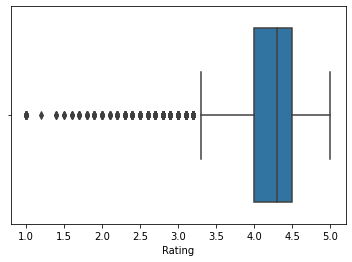

In [11]:
sns.boxplot(x='Rating', data=df)

Por mais que o boxplot indica vários _'outliers'_, considerando a distribuição, eles são valores aceitáveis e possíveis. <br/>
Portanto, não os removeremos.

##### APENAS UMA OBSERVAÇÃO
O registro com categoria '1.9', que removemos antes, tinha um rating errado/ruído.

##### Lidando com os Nulls/NaN
Como esta variável é importantíssima para a análise, precisamos ter valores reais que nos conduza a uma análise mais condizente com a realidade. Desta forma, **removeremos** todos os registros com _avaliações_ NaN.

In [12]:
df.dropna(subset=['Rating'], inplace=True)

In [13]:
df

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type Price  \
0         4.1     159                 19M      10,000+  Free     0   
1         3.9     967                 14M     500,000+  Free     0   
2         4.7   87510                8.7M   5,000,000+  Free     0   
3         4.5  215644                 25M  50,000,000+  Free     0   
4         4.3     967                2.8M     100,000+  Free     0   
...       ...     ...                 ...          ...   ...   ...   
10834     4.0       7                2.6M         500+  Free     0   
10836     4.5      38                 53M       5,000+  Free     0   
10837     5.0       4                3.6M         100+  Free     0   
10839     4.5     114  Varies with device       1,000+  Free     0   
10840     4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating                     Genres      Last Updated  \
0           Everyone               Art & Design   January 7, 2018   
1           Everyone  Art & Design;Pretend Play  January 15, 2018   
2           Everyone               Art & Design    August 1, 2018   
3               Teen               Art & Design      June 8, 2018   
4           Everyone    Art & Design;Creativity     June 20, 2018   
...              ...                        ...               ...   
10834       Everyone                  Education     June 18, 2017   
10836       Everyone                  Education     July 25, 2017   
10837       Everyone                  Education      July 6, 2018   
10839     Mature 17+          Books & Reference  January 19, 2015   
10840       Everyone                  Lifestyle     July 25, 2018   

              Current Ver         Android Ver  
0                   1.0.0        4.0.3 and up  
1                   2.0.0        4.0.3 and up  
2                   1.2.4        4.0.3 and up  
3      Varies with device          4.2 and up  
4                     1.1          4.4 and up  
...                   ...                 ...  
10834               1.0.0          4.1 and up  
10836                1.48          4.1 and up  
10837                 1.0          4.1 and up  
10839  Varies with device  Varies with device  
10840  Varies with device  Varies with device  

[9366 rows x 13 columns]

In [14]:
df['Rating'].isnull().sum()  # não temos registros com Rating NaN

0

### 2.3 Reviews (número de avaliações)

Não temos registros com valores NaN para essa variável, mas ela possui tipo errado.

In [15]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [17]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [18]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size     Installs  Type Price Content Rating  \
0      159   19M      10,000+  Free     0       Everyone   
1      967   14M     500,000+  Free     0       Everyone   
2    87510  8.7M   5,000,000+  Free     0       Everyone   
3   215644   25M  50,000,000+  Free     0           Teen   
4      967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.0+ MB


### 2.4 Size

In [20]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

Dos registros que sobraram até aqui, o atributo _'Size'_ possui os _sufixos_ 'k' e 'M' para representar escala. <br/>
Há ainda alguns registros com valor _'Varies with device'_. <br/>
A conversão destas strings para números resulta em NaN:

In [21]:
pd.to_numeric(df['Size'], errors='coerce')

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
10834   NaN
10836   NaN
10837   NaN
10839   NaN
10840   NaN
Name: Size, Length: 9366, dtype: float64

<br/>

Poderíamos simplesmente substituir o símbolo/sufixo pela sua escala: P. ex., M por 000000. <br/>
Porém, se tivermos algum número decimal, tal substituição resultará em um número errado: P. ex., 2.5M ==> 2.5000000 <br/>

Ao invés disso, basta substituirmos os símbolos por suas **notações científicas**: P. ex., 'M' ==> e+6 <br/>
Assim, a conversão de string para numérico funcionará.

In [22]:
# valores de 'Size' que terminam com 'M'
size_com_final_M = df['Size'].str.endswith('M')
size_com_final_M

0         True
1         True
2         True
3         True
4         True
         ...  
10834     True
10836     True
10837     True
10839    False
10840     True
Name: Size, Length: 9366, dtype: bool

In [23]:
df[size_com_final_M]

App            Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook      ART_AND_DESIGN   
1                                    Coloring book moana      ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...      ART_AND_DESIGN   
3                                  Sketch - Draw & Paint      ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book      ART_AND_DESIGN   
...                                                  ...                 ...   
10830                                  News Minecraft.fr  NEWS_AND_MAGAZINES   
10834                                      FR Calculator              FAMILY   
10836                                   Sya9a Maroc - FR              FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings              FAMILY   
10840      iHoroscope - 2018 Daily Horoscope & Astrology           LIFESTYLE   

       Rating  Reviews  Size     Installs  Type Price Content Rating  \
0         4.1      159   19M      10,000+  Free     0       Everyone   
1         3.9      967   14M     500,000+  Free     0       Everyone   
2         4.7    87510  8.7M   5,000,000+  Free     0       Everyone   
3         4.5   215644   25M  50,000,000+  Free     0           Teen   
4         4.3      967  2.8M     100,000+  Free     0       Everyone   
...       ...      ...   ...          ...   ...   ...            ...   
10830     3.8      881  2.3M     100,000+  Free     0       Everyone   
10834     4.0        7  2.6M         500+  Free     0       Everyone   
10836     4.5       38   53M       5,000+  Free     0       Everyone   
10837     5.0        4  3.6M         100+  Free     0       Everyone   
10840     4.5   398307   19M  10,000,000+  Free     0       Everyone   

                          Genres      Last Updated         Current Ver  \
0                   Art & Design   January 7, 2018               1.0.0   
1      Art & Design;Pretend Play  January 15, 2018               2.0.0   
2                   Art & Design    August 1, 2018               1.2.4   
3                   Art & Design      June 8, 2018  Varies with device   
4        Art & Design;Creativity     June 20, 2018                 1.1   
...                          ...               ...                 ...   
10830           News & Magazines  January 20, 2014                 1.5   
10834                  Education     June 18, 2017               1.0.0   
10836                  Education     July 25, 2017                1.48   
10837                  Education      July 6, 2018                 1.0   
10840                  Lifestyle     July 25, 2018  Varies with device   

              Android Ver  
0            4.0.3 and up  
1            4.0.3 and up  
2            4.0.3 and up  
3              4.2 and up  
4              4.4 and up  
...                   ...  
10830          1.6 and up  
10834          4.1 and up  
10836          4.1 and up  
10837          4.1 and up  
10840  Varies with device  

[7471 rows x 13 columns]

In [24]:
# valores de 'Size' que terminam com 'k'
size_com_final_k = df['Size'].str.endswith('k')
df[size_com_final_k]

App             Category  Rating  Reviews  \
58                 Restart Navigator    AUTO_AND_VEHICLES     4.0     1403   
209                  Plugin:AOT v5.0             BUSINESS     3.1     4034   
384    Hangouts Dialer - Call Phones        COMMUNICATION     4.0   122498   
450                      Caller ID +        COMMUNICATION     4.0     9498   
458                      GO Notifier        COMMUNICATION     4.2   124346   
...                              ...                  ...     ...      ...   
10732             Draw with FP sDraw                TOOLS     4.3     3268   
10755                 Hondata Mobile  MAPS_AND_NAVIGATION     4.3      334   
10763            FP Разбитый дисплей               FAMILY     4.5      922   
10832                       FR Tides              WEATHER     3.8     1195   
10833                    Chemin (fr)  BOOKS_AND_REFERENCE     4.8       44   

       Size     Installs  Type Price Content Rating             Genres  \
58     201k     100,000+  Free     0       Everyone    Auto & Vehicles   
209     23k     100,000+  Free     0       Everyone           Business   
384     79k  10,000,000+  Free     0       Everyone      Communication   
450    118k   1,000,000+  Free     0       Everyone      Communication   
458    695k  10,000,000+  Free     0       Everyone      Communication   
...     ...          ...   ...   ...            ...                ...   
10732  467k     100,000+  Free     0       Everyone              Tools   
10755  676k      10,000+  Free     0       Everyone  Maps & Navigation   
10763  552k      50,000+  Free     0       Everyone      Entertainment   
10832  582k     100,000+  Free     0       Everyone            Weather   
10833  619k       1,000+  Free     0       Everyone  Books & Reference   

             Last Updated           Current Ver   Android Ver  
58        August 26, 2014                 1.0.1    2.2 and up  
209    September 11, 2015  3.0.1.11 (Build 311)    2.2 and up  
384     September 2, 2015         0.1.100944346  4.0.3 and up  
450          June 7, 2016                5.28.0    2.3 and up  
458          July 6, 2014                   2.8    2.0 and up  
...                   ...                   ...           ...  
10732   December 16, 2017                   6.6    2.0 and up  
10755     August 23, 2016                   1.3  2.3.3 and up  
10763  September 20, 2014                   1.1    1.6 and up  
10832   February 16, 2014                   6.0    2.1 and up  
10833      March 23, 2014                   0.8    2.2 and up  

[258 rows x 13 columns]

In [25]:
size_que_nao_terminam_com_k_ou_M = ~(size_com_final_M | size_com_final_k)
df[size_que_nao_terminam_com_k_ou_M]

App             Category  \
37                                    Floor Plan Creator       ART_AND_DESIGN   
42                            Textgram - write on photos       ART_AND_DESIGN   
52                         Used Cars and Trucks for Sale    AUTO_AND_VEHICLES   
67                                    Ulysse Speedometer    AUTO_AND_VEHICLES   
68                                                REPUVE    AUTO_AND_VEHICLES   
...                                                  ...                  ...   
10713  My Earthquake Alerts - US & Worldwide Earthquakes              WEATHER   
10725                                          Posta App  MAPS_AND_NAVIGATION   
10765                    Chat For Strangers - Video Chat               SOCIAL   
10826          Frim: get new friends on local chat rooms               SOCIAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   

       Rating  Reviews                Size     Installs  Type Price  \
37        4.1    36639  Varies with device   5,000,000+  Free     0   
42        4.4   295221  Varies with device  10,000,000+  Free     0   
52        4.6    17057  Varies with device   1,000,000+  Free     0   
67        4.3    40211  Varies with device   5,000,000+  Free     0   
68        3.9      356  Varies with device     100,000+  Free     0   
...       ...      ...                 ...          ...   ...   ...   
10713     4.4     3471  Varies with device     100,000+  Free     0   
10725     3.6        8  Varies with device       1,000+  Free     0   
10765     3.4      622  Varies with device     100,000+  Free     0   
10826     4.0    88486  Varies with device   5,000,000+  Free     0   
10839     4.5      114  Varies with device       1,000+  Free     0   

      Content Rating             Genres        Last Updated  \
37          Everyone       Art & Design       July 14, 2018   
42          Everyone       Art & Design       July 30, 2018   
52          Everyone    Auto & Vehicles       July 30, 2018   
67          Everyone    Auto & Vehicles       July 30, 2018   
68          Everyone    Auto & Vehicles        May 25, 2018   
...              ...                ...                 ...   
10713       Everyone            Weather       July 24, 2018   
10725       Everyone  Maps & Navigation  September 27, 2017   
10765     Mature 17+             Social        May 23, 2018   
10826     Mature 17+             Social      March 23, 2018   
10839     Mature 17+  Books & Reference    January 19, 2015   

              Current Ver         Android Ver  
37     Varies with device        2.3.3 and up  
42     Varies with device  Varies with device  
52     Varies with device  Varies with device  
67     Varies with device  Varies with device  
68     Varies with device  Varies with device  
...                   ...                 ...  
10713  Varies with device  Varies with device  
10725  Varies with device          4.4 and up  
10765  Varies with device  Varies with device  
10826  Varies with device  Varies with device  
10839  Varies with device  Varies with device  

[1637 rows x 13 columns]

##### **Consertando 'Size'**

In [26]:
# removendo os símbolos
df['Size'] = df['Size'].str.replace('k', 'e+3', regex=False)
df['Size'] = df['Size'].str.replace('M', 'e+6', regex=False)

In [27]:
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

In [28]:
df.loc[size_com_final_k, ['Size']]

Size
58     201000.0
209     23000.0
384     79000.0
450    118000.0
458    695000.0
...         ...
10732  467000.0
10755  676000.0
10763  552000.0
10832  582000.0
10833  619000.0

[258 rows x 1 columns]

##### **Lidando com os valores NaN**

In [29]:
print(f"Quantidade de registros com 'Size' NaN: {df['Size'].isnull().sum()} ({(df['Size'].isnull().sum() * 100) / df.shape[0]:.2f}%)")

Quantidade de registros com 'Size' NaN: 1637 (17.48%)


Após as conversões para o 'Size', temos **1637** valores NaN agora, que é uma quantidade considerável de registros do dataset (17.48%). Estes valores correspondem aos registros com valores _'Varies with device'_. <br/>

Vamos assumir que a variável Size não é extremamente crucial em nossa análise, de modo que aproximar seus valores é aceitável. Logo, vamos assumir a seguinte estratégia: atribuir o valor da **mediana** do Size da categoria para cada registro NaN.

In [30]:
apps_com_size_null_bool = df['Size'].isnull()
categorias_com_size_null = df.loc[apps_com_size_null_bool, 'Category'].unique()

for cat in categorias_com_size_null:
    categorias_bool = df['Category'] == cat
    df.loc[categorias_bool & apps_com_size_null_bool, 'Size'] = df.loc[categorias_bool & ~apps_com_size_null_bool, 'Size'].median()

In [31]:
df['Size'].isnull().sum()  # não temos mais nenhum registro com Size NaN

0

##### **Remoção de Outliers**

<AxesSubplot:xlabel='Size'>

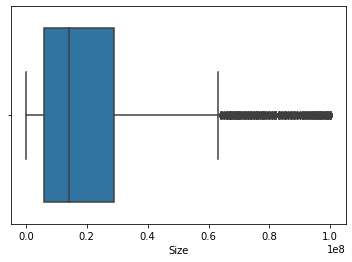

In [32]:
sns.boxplot(x='Size', data=df)

In [33]:
df.query('Size >= 1e8')

App            Category  \
1080                                         Post Bank             FINANCE   
1565                    Talking Babsy Baby: Baby Games           LIFESTYLE   
1758                            Hungry Shark Evolution                GAME   
1793                 Mini Golf King - Multiplayer Game                GAME   
1988                            Hungry Shark Evolution                GAME   
2299                              Navi Radiography Pro             MEDICAL   
3973                            Hungry Shark Evolution                GAME   
4690                                        Vi Trainer  HEALTH_AND_FITNESS   
5427                                   Ultimate Tennis              SPORTS   
5530                       The Walking Dead: Our World                GAME   
5862                             Miami crime simulator                GAME   
5865                      Gangster Town: Vice District              FAMILY   
7404                                   SimCity BuildIt              FAMILY   
8409  Car Crash III Beam DH Real Damage Simulator 2018                GAME   
8847                        Draft Simulator for FUT 18              SPORTS   
9170                     Stickman Legends: Shadow Wars                GAME   

      Rating  Reviews         Size      Installs  Type   Price Content Rating  \
1080     4.5    60449  100000000.0    1,000,000+  Free       0       Everyone   
1565     4.0   140995  100000000.0   10,000,000+  Free       0       Everyone   
1758     4.5  6074334  100000000.0  100,000,000+  Free       0           Teen   
1793     4.5   531458  100000000.0    5,000,000+  Free       0       Everyone   
1988     4.5  6074627  100000000.0  100,000,000+  Free       0           Teen   
2299     4.7       11  100000000.0          500+  Paid  $15.99       Everyone   
3973     4.5  6071542  100000000.0  100,000,000+  Free       0           Teen   
4690     3.6      124  100000000.0        5,000+  Free       0       Everyone   
5427     4.3   183004  100000000.0   10,000,000+  Free       0       Everyone   
5530     4.0    22435  100000000.0    1,000,000+  Free       0           Teen   
5862     4.0   254518  100000000.0   10,000,000+  Free       0     Mature 17+   
5865     4.3    65146  100000000.0   10,000,000+  Free       0     Mature 17+   
7404     4.5  4218587  100000000.0   50,000,000+  Free       0   Everyone 10+   
8409     3.6      151  100000000.0       10,000+  Free       0       Everyone   
8847     4.6   162933  100000000.0    5,000,000+  Free       0       Everyone   
9170     4.4    38419  100000000.0    1,000,000+  Paid   $0.99   Everyone 10+   

                      Genres      Last Updated   Current Ver   Android Ver  
1080                 Finance     July 23, 2018        2.9.12    4.0 and up  
1565  Lifestyle;Pretend Play     July 16, 2018           9.0    4.0 and up  
1758                  Arcade     July 25, 2018         6.0.0    4.1 and up  
1793                  Sports     July 20, 2018        3.04.1  4.0.3 and up  
1988                  Arcade     July 25, 2018         6.0.0    4.1 and up  
2299                 Medical  January 14, 2018         1.2.0  4.0.3 and up  
3973                  Arcade     July 25, 2018         6.0.0    4.1 and up  
4690        Health & Fitness    August 2, 2018      2.0.0.11    5.0 and up  
5427                  Sports     July 19, 2018     2.29.3118  4.0.3 and up  
5530                  Action    August 1, 2018       1.1.0.3    5.0 and up  
5862                  Action      July 9, 2018           2.0    4.0 and up  
5865              Simulation      May 31, 2018           2.1    4.0 and up  
7404              Simulation     June 19, 2018  1.23.3.75024    4.0 and up  
8409                  Racing      May 20, 2018          1.03    4.1 and up  
8847                  Sports      May 11, 2018          25.7    4.1 and up  
9170                  Action    August 3, 2018        2.3.24    4.1 and up

Por mais que a grande maioria dos apps (75%) são pequenos, os outros não são necessariamente outliers para removermos. <br/>
É comum existir apps maiores, principalmente _games_. Portanto, não removeremos nenhum outlier desse atributo.

### 2.5 Installs

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.0+ MB


In [35]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews        Size     Installs  Type Price Content Rating  \
0      159  19000000.0      10,000+  Free     0       Everyone   
1      967  14000000.0     500,000+  Free     0       Everyone   
2    87510   8700000.0   5,000,000+  Free     0       Everyone   
3   215644  25000000.0  50,000,000+  Free     0           Teen   
4      967   2800000.0     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

Essa coluna (**Installs**) possui valores com sufixo '+' para indicar que o número de instalação é maior do que o valor passado. <br/>
Vamos simplificar e assumir que o número de instalação é fixo. Mas, atentamos às virgulas que também precisam ser removidas. <br/>

In [36]:
df['Installs'] = df['Installs'].str.replace('+', '', regex=False)
df['Installs'] = df['Installs'].str.replace(',', '', regex=False)

<br/>

Finalmente, vamos converter o tipo para **Numérico**.

In [37]:
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews        Size  Installs  Type Price Content Rating  \
0      159  19000000.0     10000  Free     0       Everyone   
1      967  14000000.0    500000  Free     0       Everyone   
2    87510   8700000.0   5000000  Free     0       Everyone   
3   215644  25000000.0  50000000  Free     0           Teen   
4      967   2800000.0    100000  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [38]:
df['Installs'].isnull().sum()  # Não há nenhum registro com Installs NaN

0

##### **Remoção de Outliers**

<AxesSubplot:xlabel='Installs'>

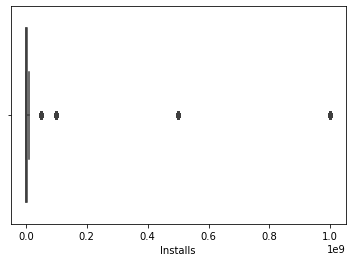

In [39]:
sns.boxplot(x='Installs', data=df)

In [40]:
# mostre os 10 apps mais baixados
df.sort_values(by='Installs', ascending=False).head(10)

App            Category  Rating   Reviews  \
3816                   Google News  NEWS_AND_MAGAZINES     3.9    877643   
3996  Google Chrome: Fast & Secure       COMMUNICATION     4.3   9642112   
451                          Gmail       COMMUNICATION     4.3   4604483   
3117     Maps - Navigate & Explore    TRAVEL_AND_LOCAL     4.3   9235155   
9844                   Google News  NEWS_AND_MAGAZINES     3.9    878065   
1654                Subway Surfers                GAME     4.5  27722264   
5395                 Google Photos         PHOTOGRAPHY     4.5  10847682   
411   Google Chrome: Fast & Secure       COMMUNICATION     4.3   9643041   
3523                  Google Drive        PRODUCTIVITY     4.4   2731211   
865              Google Play Games       ENTERTAINMENT     4.3   7165362   

            Size    Installs  Type Price Content Rating            Genres  \
3816  13000000.0  1000000000  Free     0           Teen  News & Magazines   
3996   6100000.0  1000000000  Free     0       Everyone     Communication   
451    6100000.0  1000000000  Free     0       Everyone     Communication   
3117  19000000.0  1000000000  Free     0       Everyone    Travel & Local   
9844  13000000.0  1000000000  Free     0           Teen  News & Magazines   
1654  76000000.0  1000000000  Free     0   Everyone 10+            Arcade   
5395  10500000.0  1000000000  Free     0       Everyone       Photography   
411    6100000.0  1000000000  Free     0       Everyone     Communication   
3523   7000000.0  1000000000  Free     0       Everyone      Productivity   
865   19000000.0  1000000000  Free     0           Teen     Entertainment   

        Last Updated         Current Ver         Android Ver  
3816  August 1, 2018               5.2.0          4.4 and up  
3996  August 1, 2018  Varies with device  Varies with device  
451   August 2, 2018  Varies with device  Varies with device  
3117   July 31, 2018  Varies with device  Varies with device  
9844  August 1, 2018               5.2.0          4.4 and up  
1654   July 12, 2018              1.90.0          4.1 and up  
5395  August 1, 2018  Varies with device  Varies with device  
411   August 1, 2018  Varies with device  Varies with device  
3523  August 6, 2018  Varies with device  Varies with device  
865    July 16, 2018  Varies with device  Varies with device

Apesar do boxplot informar 'outliers' claros, tais apps mais bem baixados são aplicativos muito usados, o que condiz com a realidade. Deixaremos estes 'outliers' no dataset. Mas, durante a análise exploratória, pode ser interessante removê-los para uma análise mais refinada dos casos gerais.

Note ainda um caso curioso: Há **registros duplicados**: P. Ex., Google News (índices 3816, 9844). <br/>
Precisaremos _removê-los_ para uma análise mais fidedígna. Faremos isso jajá.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.0+ MB


### 2.6 Type
Vamos checar se não há outliers no atributo 'Type'.

In [42]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

Há apenas dois tipos de apps válidos: 'Free' e 'Paid'. Vamos verificar se temos registros com tipo NaN também:

In [43]:
df[df['Type'].isnull()]

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

O atual dataframe não contém registros NaN para o 'Type'. Pode ser que o dataset original possuísse, mas não o dataset pré-processado até o momento.

In [44]:
df['Type'].isnull().sum()  # 0 registros com Type NaN

0

### 2.7 Price

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.0+ MB


In [46]:
# checando todos os valores de preço (são strings por ora)
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

Os valores são guardados com cifrão (dólares). Vamos remover o cifrão e depois converter a **string** para um **tipo numérico**.

In [47]:
df['Price'] = df['Price'].str.replace('$', '', regex=False)

In [48]:
# Convertendo de string para numérico
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [49]:
# quantidade de registros com preço NaN
df['Price'].isnull().sum()

0

##### **Checando se há apps 'Free' com _Preços_ diferentes de Zero**

In [50]:
df.query('Type == "Free" and Price != 0')

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

Não há nenhum app Free com preço diferente de Zero.

##### **Remoção de Outliers**

<AxesSubplot:xlabel='Price'>

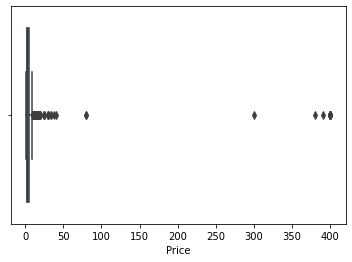

In [51]:
sns.boxplot(x='Price', data=df.query('Type == "Paid"'))

Temos alguns casos um pouco suspeitos (muito caros). Vamos investigá-los.

In [52]:
df.query('Type == "Paid"').sort_values(by='Price', ascending=False).head(10)

App   Category  Rating  Reviews        Size  \
4367        I'm Rich - Trump Edition  LIFESTYLE     3.6      275   7300000.0   
5356               I Am Rich Premium    FINANCE     4.1     1867   4700000.0   
4362                      💎 I'm rich  LIFESTYLE     3.8      718  26000000.0   
5364  I am rich (Most expensive app)    FINANCE     4.1      129   2700000.0   
4197          most expensive app (H)     FAMILY     4.3        6   1500000.0   
5362                   I Am Rich Pro     FAMILY     4.4      201   2700000.0   
5373              I AM RICH PRO PLUS    FINANCE     4.0       36  41000000.0   
5359              I am rich(premium)    FINANCE     3.5      472    965000.0   
5358                      I am Rich!    FINANCE     3.8       93  22000000.0   
5351                       I am rich  LIFESTYLE     3.8     3547   1800000.0   

      Installs  Type   Price Content Rating         Genres       Last Updated  \
4367     10000  Paid  400.00       Everyone      Lifestyle        May 3, 2018   
5356     50000  Paid  399.99       Everyone        Finance  November 12, 2017   
4362     10000  Paid  399.99       Everyone      Lifestyle     March 11, 2018   
5364      1000  Paid  399.99           Teen        Finance   December 6, 2017   
4197       100  Paid  399.99       Everyone  Entertainment      July 16, 2018   
5362      5000  Paid  399.99       Everyone  Entertainment       May 30, 2017   
5373      1000  Paid  399.99       Everyone        Finance      June 25, 2018   
5359      5000  Paid  399.99       Everyone        Finance        May 1, 2017   
5358      1000  Paid  399.99       Everyone        Finance  December 11, 2017   
5351    100000  Paid  399.99       Everyone      Lifestyle   January 12, 2018   

     Current Ver   Android Ver  
4367       1.0.1    4.1 and up  
5356         1.6    4.0 and up  
4362       1.0.0    4.4 and up  
5364           2  4.0.3 and up  
4197         1.0    7.0 and up  
5362        1.54    1.6 and up  
5373       1.0.2    4.1 and up  
5359         3.4    4.4 and up  
5358         1.0    4.1 and up  
5351         2.0  4.0.3 and up

Os outliers do preço são casos reais de aplicativos (inúteis) vendidos absurdamente caros, ou seja, não são foram obtidos erroneamente no dataset. Vamos deixá-los neste momento, mas uma análise sem esses casos deverá ser feita durante a análise exploratória.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.0+ MB


### 2.8 Content Rating

In [54]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

Não há registros com valores NaN e nem categorias esquisitas/ruídos. <br/>
Não temos nada pra fazer pra essa variável.

### 2.9 Genres
A coluna não possui valores NaN.

In [55]:
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

A variável de _gênero_ possui uma peculiaridade: há categorias que na verdade representam múltiplas categorias. <br/>
P. ex., um aplicativo do gênero _Art & Design;Pretend Play_ na verdade possui **dois gêneros**: _Art & Design_ e _Pretend Play_. <br/>

Uma forma de tratar isso é **replicar os registros com múltiplos gêneros**, criando **uma cópia** para cada gênero: <br/>
P. ex: <br/>

De:

|App      | Price   | Genre
|---------|---------|--------------------------
|MyApp    | 10.0    | Art & Design;Pretend Play

Para:

|App      | Price   | Genre
|---------|---------|-------------
|MyApp    | 10.0    | Art & Design
|MyApp    | 10.0    | Pretend Play



Assim, conseguimos contabilizar corretamente estatísticas para este atributos. 

A **limitação** desta abordagem é que ela _impacta a análise de outros atributos_, justamente pela duplicidade. <br/>
Se nossa tabela possuir registros repetidos, na hora de analisarmos qualquer atributo, p. ex., a avaliação dos apps, tais dados replicados impactaram os resultados da análise.

Vamos optar por deixar tais valores de gêneros do jeito que estão, por ora. No momento de analisarmos esta coluna, a processaremos adequadamente.

### 2.10 Last Updated
A coluna não possui valores NaN, mas possui tipo de dados errado.

In [56]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9366 non-null   object        
 1   Category        9366 non-null   object        
 2   Rating          9366 non-null   float64       
 3   Reviews         9366 non-null   int64         
 4   Size            9366 non-null   float64       
 5   Installs        9366 non-null   int64         
 6   Type            9366 non-null   object        
 7   Price           9366 non-null   float64       
 8   Content Rating  9366 non-null   object        
 9   Genres          9366 non-null   object        
 10  Last Updated    9366 non-null   datetime64[ns]
 11  Current Ver     9362 non-null   object        
 12  Android Ver     9364 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.0+ MB


### 2.11 Current Ver
A coluna possui alguns valores NaN. Vamos checá-los.

##### Lidando com valores NaN

In [58]:
df[df['Current Ver'].isnull()]

App            Category  Rating  Reviews  \
15    Learn To Draw Kawaii Characters      ART_AND_DESIGN     3.2       55   
1553             Market Update Helper  LIBRARIES_AND_DEMO     4.1    20145   
6322           Virtual DJ Sound Mixer               TOOLS     4.2     4010   
7333                      Dots puzzle              FAMILY     4.0      179   

            Size  Installs  Type  Price Content Rating            Genres  \
15     2700000.0      5000  Free   0.00       Everyone      Art & Design   
1553     11000.0   1000000  Free   0.00       Everyone  Libraries & Demo   
6322   8700000.0    500000  Free   0.00       Everyone             Tools   
7333  14000000.0     50000  Paid   0.99       Everyone            Puzzle   

     Last Updated Current Ver Android Ver  
15     2018-06-06         NaN  4.2 and up  
1553   2013-02-12         NaN  1.5 and up  
6322   2017-05-10         NaN  4.0 and up  
7333   2018-04-18         NaN  4.0 and up

Nós temos apenas alguns registros cuja _versão informada do aplicativo_ é NaN. <br/>
Poderíamos simplesmente remover tais registros, uma vez que a quantidade é bem pequena. <br/>

Ao invés disso, podemos simplesmente considerar que a versão atual é a versão _1.0.0_, que é uma aproximação razoável. Como se trata de uma quantidade pequena de registros, ambas as estratégias são adequadas.

In [59]:
df.fillna(value={'Current Ver': '1.0.0'}, inplace=True)

In [60]:
df['Current Ver'].isnull().sum()  # não temos mais registros null/nan para esse atributo

0

In [61]:
df.iloc[15]

App               Learn To Draw Kawaii Characters
Category                           ART_AND_DESIGN
Rating                                        3.2
Reviews                                        55
Size                                    2700000.0
Installs                                     5000
Type                                         Free
Price                                         0.0
Content Rating                           Everyone
Genres                               Art & Design
Last Updated                  2018-06-06 00:00:00
Current Ver                                 1.0.0
Android Ver                            4.2 and up
Name: 15, dtype: object

##### **Inspecionandos os valores do atributo**

In [62]:
df['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.5.447', '1.0.612928', '0.3.4'],
      dtype=object)

Aparentemente, as versões seguem um padrão: _números seguidos de um ponto_. Podemos checar se há registros que não seguem esse padrão, usando **expressões regulares**.

In [63]:
# padrão válido para as versões dos aplicativos
is_pattern = df['Current Ver'].str.match(r'^[0-9]+(\.[0-9]+)*$')

# padrão válido para as versões dos aplicativos
is_not_pattern = ~is_pattern

In [64]:
df[is_not_pattern]

App             Category  \
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
37                                    Floor Plan Creator       ART_AND_DESIGN   
42                            Textgram - write on photos       ART_AND_DESIGN   
52                         Used Cars and Trucks for Sale    AUTO_AND_VEHICLES   
62     ezETC (ETC balance inquiry, meter trial, real-...    AUTO_AND_VEHICLES   
...                                                  ...                  ...   
10725                                          Posta App  MAPS_AND_NAVIGATION   
10765                    Chat For Strangers - Video Chat               SOCIAL   
10826          Frim: get new friends on local chat rooms               SOCIAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews        Size  Installs  Type  Price Content Rating  \
3         4.5   215644  25000000.0  50000000  Free    0.0           Teen   
37        4.1    36639   9200000.0   5000000  Free    0.0       Everyone   
42        4.4   295221   9200000.0  10000000  Free    0.0       Everyone   
52        4.6    17057  16000000.0   1000000  Free    0.0       Everyone   
62        4.3    38846   8600000.0   1000000  Free    0.0       Everyone   
...       ...      ...         ...       ...   ...    ...            ...   
10725     3.6        8  10000000.0      1000  Free    0.0       Everyone   
10765     3.4      622   9900000.0    100000  Free    0.0     Mature 17+   
10826     4.0    88486   9900000.0   5000000  Free    0.0     Mature 17+   
10839     4.5      114   7150000.0      1000  Free    0.0     Mature 17+   
10840     4.5   398307  19000000.0  10000000  Free    0.0       Everyone   

                  Genres Last Updated         Current Ver         Android Ver  
3           Art & Design   2018-06-08  Varies with device          4.2 and up  
37          Art & Design   2018-07-14  Varies with device        2.3.3 and up  
42          Art & Design   2018-07-30  Varies with device  Varies with device  
52       Auto & Vehicles   2018-07-30  Varies with device  Varies with device  
62       Auto & Vehicles   2018-07-28       2.20 Build 02          4.1 and up  
...                  ...          ...                 ...                 ...  
10725  Maps & Navigation   2017-09-27  Varies with device          4.4 and up  
10765             Social   2018-05-23  Varies with device  Varies with device  
10826             Social   2018-03-23  Varies with device  Varies with device  
10839  Books & Reference   2015-01-19  Varies with device  Varies with device  
10840          Lifestyle   2018-07-25  Varies with device  Varies with device  

[1747 rows x 13 columns]

In [65]:
df.loc[is_not_pattern, 'Current Ver'].unique()

array(['Varies with device', '2.20 Build 02', '18.05.31+530',
       '3.0.1.11 (Build 311)', '3.4.3_world', 'R6.0.3',
       '1.60.0.31354-release', '37.1.206017801.DR37_RC14', '7.3(800241)',
       '8.1.2-6310', '5.1.2-6310', '4.4B', '1.308.us', '3.8.75a',
       '4.9.2 (Oasis)', '1.5-beta', '3.6.0.115_FN', '1.5-play',
       '1.1.1-play', 'v1.8b22p13', '2.3.34 Prod', 'Cannonau 3.11.11',
       '8.0bld14', '4.1.1-0-prod', '3.04 - Beta', '3.2.0d',
       '2.76.2.0-android', 'p5.7.1', '7.3.4-play', '3.3.0(1)',
       'Public.Heal', '1.31.0-15160.950adac99', '8.2.0_8', 'v3.1.1',
       '5.2.4(881)', '1.0.0.21_180410', '2.4.12-r244', 'Version:6.97',
       '5.2.2018010801-1', '3.8.5.Go', '2.0081_206', '1_39_93',
       '1.2.3-play', '3.2.0h', '1.10.0.user.pro.release',
       '4.1.5 (Steglitz)', '1.7.1 (946)', '3.1-2018 – (13)',
       '1.830.0.564-(e405bb2)', 'PN.1.0', '10.4.1.015_05',
       '10.4.1.000_00', '2.5.0 b665', '1.4.15-free', 'T4.6.5-tl2.0.1',
       '50.2 lite', '6.25.0+1906

Existem diversos valores que não seguem o padrão que especificamos. Vamos deixar como está. Alteraremos apenas o valor 'Varies with device' para '1.0.0'.

In [66]:
df['Current Ver'] = df['Current Ver'].replace('Varies with device', '1.0.0')

In [67]:
df[is_not_pattern].head()

App           Category  \
3                               Sketch - Draw & Paint     ART_AND_DESIGN   
37                                 Floor Plan Creator     ART_AND_DESIGN   
42                         Textgram - write on photos     ART_AND_DESIGN   
52                      Used Cars and Trucks for Sale  AUTO_AND_VEHICLES   
62  ezETC (ETC balance inquiry, meter trial, real-...  AUTO_AND_VEHICLES   

    Rating  Reviews        Size  Installs  Type  Price Content Rating  \
3      4.5   215644  25000000.0  50000000  Free    0.0           Teen   
37     4.1    36639   9200000.0   5000000  Free    0.0       Everyone   
42     4.4   295221   9200000.0  10000000  Free    0.0       Everyone   
52     4.6    17057  16000000.0   1000000  Free    0.0       Everyone   
62     4.3    38846   8600000.0   1000000  Free    0.0       Everyone   

             Genres Last Updated    Current Ver         Android Ver  
3      Art & Design   2018-06-08          1.0.0          4.2 and up  
37     Art & Design   2018-07-14          1.0.0        2.3.3 and up  
42     Art & Design   2018-07-30          1.0.0  Varies with device  
52  Auto & Vehicles   2018-07-30          1.0.0  Varies with device  
62  Auto & Vehicles   2018-07-28  2.20 Build 02          4.1 and up

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9366 non-null   object        
 1   Category        9366 non-null   object        
 2   Rating          9366 non-null   float64       
 3   Reviews         9366 non-null   int64         
 4   Size            9366 non-null   float64       
 5   Installs        9366 non-null   int64         
 6   Type            9366 non-null   object        
 7   Price           9366 non-null   float64       
 8   Content Rating  9366 non-null   object        
 9   Genres          9366 non-null   object        
 10  Last Updated    9366 non-null   datetime64[ns]
 11  Current Ver     9366 non-null   object        
 12  Android Ver     9364 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.0+ MB


### 2.12 Android Ver
A coluna possui alguns valores NaN. Vamos checá-los.

#### Lidando com valores NaN

In [69]:
df[df['Android Ver'].isnull()]

App         Category  Rating  Reviews        Size  \
4453  [substratum] Vacuum: P  PERSONALIZATION     4.4      230  11000000.0   
4490    Pi Dark [substratum]  PERSONALIZATION     4.5      189   2100000.0   

      Installs  Type  Price Content Rating           Genres Last Updated  \
4453      1000  Paid   1.49       Everyone  Personalization   2018-07-20   
4490     10000  Free   0.00       Everyone  Personalization   2018-03-27   

     Current Ver Android Ver  
4453         4.4         NaN  
4490         1.1         NaN

Temos apenas 2 registros que possui valor NaN para este atributo. <br/>
Atribuir um valor fictício para eles, p. ex. '1.0', não faz muito sentido, uma vez que é a versão do Android impacta diretamente muitos aplicativos. Uma versão Android diferente, por mais pequena que seja, pode impactar o funcionamento dos apps.<br/>
Este efeito não é muito relevante para a versão dos apps. <br/>

Poderíamos estimar uma versão do Android para tais apps a partir da data da última atualização ('Last Update'). Mas, é muito trabalho para poucos registros.

Vamos simplesmente **remover** tais registros.

In [70]:
df.dropna(subset=['Android Ver'], inplace=True)

In [71]:
df['Android Ver'].isnull().sum()  # não há mais registros com valores NaN para este atributo

0

#### Checando os valores restantes

In [72]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up', '3.2 and up',
       '4.4W and up', '5.1 and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up'], dtype=object)

Note que temos diferentes formatações para a versão do Android, incluindo um 'Varies with device'. <br/>
Como são muitas peculiaridades, deixaremos a limpeza e pré-processamento desta coluna para o momento da análise exploratória.

### 2.13 Removendo Registros Duplicados
No item **2.5 Installs**, vimos que o dataset possui registros duplicados (o mesmo registro repetidos várias vezes). <br/>
Vamos analisar tal caso.

In [73]:
# Retorna uma Series booleana mostrando os registros/linhas duplicados.
# Se nenhum subset for passado, um registro é considerado duplicado apenas
# se TODOS os valores das colunas de um registro são respectivamente iguais às de outro registro
# 
# keep='first' irá manter a primeira ocorrência de cada duplicação, ou seja, o valor desses casos será False
df.duplicated(keep='first')

0        False
1        False
2        False
3        False
4        False
         ...  
10834    False
10836    False
10837    False
10839    False
10840    False
Length: 9364, dtype: bool

In [74]:
df[df.duplicated(keep='first')]

App      Category  Rating  \
229                       Quick PDF Scanner + OCR FREE      BUSINESS     4.2   
236                                                Box      BUSINESS     4.2   
239                                 Google My Business      BUSINESS     4.4   
256                                ZOOM Cloud Meetings      BUSINESS     4.4   
261                          join.me - Simple Meetings      BUSINESS     4.0   
...                                                ...           ...     ...   
8643                    Wunderlist: To-Do List & Tasks  PRODUCTIVITY     4.6   
8654   TickTick: To Do List with Reminder, Day Planner  PRODUCTIVITY     4.6   
8658                           ColorNote Notepad Notes  PRODUCTIVITY     4.6   
10049        Airway Ex - Intubate. Anesthetize. Train.       MEDICAL     4.3   
10768                                             AAFP       MEDICAL     3.8   

       Reviews        Size   Installs  Type  Price Content Rating  \
229      80805  10000000.0    5000000  Free    0.0       Everyone   
236     159872  10000000.0   10000000  Free    0.0       Everyone   
239      70991  10000000.0    5000000  Free    0.0       Everyone   
256      31614  37000000.0   10000000  Free    0.0       Everyone   
261       6989  10000000.0    1000000  Free    0.0       Everyone   
...        ...         ...        ...   ...    ...            ...   
8643    404610   7000000.0   10000000  Free    0.0       Everyone   
8654     25370   7000000.0    1000000  Free    0.0       Everyone   
8658   2401017   7000000.0  100000000  Free    0.0       Everyone   
10049      123  86000000.0      10000  Free    0.0       Everyone   
10768       63  24000000.0      10000  Free    0.0       Everyone   

             Genres Last Updated       Current Ver         Android Ver  
229        Business   2018-02-26             1.0.0        4.0.3 and up  
236        Business   2018-07-31             1.0.0  Varies with device  
239        Business   2018-07-24  2.19.0.204537701          4.4 and up  
256        Business   2018-07-20    4.1.28165.0716          4.0 and up  
261        Business   2018-07-16         4.3.0.508          4.4 and up  
...             ...          ...               ...                 ...  
8643   Productivity   2018-04-06             1.0.0  Varies with device  
8654   Productivity   2018-08-06             1.0.0  Varies with device  
8658   Productivity   2018-06-27             1.0.0  Varies with device  
10049       Medical   2018-06-01            0.6.88          5.0 and up  
10768       Medical   2018-06-22             2.3.1          5.0 and up  

[474 rows x 13 columns]

Temos **474** registros duplicados. Vamos checar os aplicativos.

In [75]:
df[df.duplicated(keep='first')].sort_values(by='App')

App            Category  \
1407                              10 Best Foods for You  HEALTH_AND_FITNESS   
2543                         1800 Contacts - Lens Store             MEDICAL   
2385                         2017 EMRA Antibiotic Guide             MEDICAL   
1434                       21-Day Meditation Experience  HEALTH_AND_FITNESS   
7035                             420 BZ Budeze Delivery             MEDICAL   
...                                                 ...                 ...   
3063  theScore: Live Sports Scores, News, Stats & Vi...              SPORTS   
3085  theScore: Live Sports Scores, News, Stats & Vi...              SPORTS   
3014  theScore: Live Sports Scores, News, Stats & Vi...              SPORTS   
3118                           trivago: Hotels & Travel    TRAVEL_AND_LOCAL   
3202                           trivago: Hotels & Travel    TRAVEL_AND_LOCAL   

      Rating  Reviews        Size  Installs  Type  Price Content Rating  \
1407     4.0     2490   3800000.0    500000  Free   0.00   Everyone 10+   
2543     4.7    23160  26000000.0   1000000  Free   0.00       Everyone   
2385     4.4       12   3800000.0      1000  Paid  16.99       Everyone   
1434     4.4    11506  15000000.0    100000  Free   0.00       Everyone   
7035     5.0        2  11000000.0       100  Free   0.00     Mature 17+   
...      ...      ...         ...       ...   ...    ...            ...   
3063     4.4   133833  34000000.0  10000000  Free   0.00   Everyone 10+   
3085     4.4   133833  34000000.0  10000000  Free   0.00   Everyone 10+   
3014     4.4   133825  34000000.0  10000000  Free   0.00   Everyone 10+   
3118     4.2   219848  19000000.0  50000000  Free   0.00       Everyone   
3202     4.2   219848  19000000.0  50000000  Free   0.00       Everyone   

                Genres Last Updated Current Ver         Android Ver  
1407  Health & Fitness   2017-02-17         1.9        2.3.3 and up  
2543           Medical   2018-07-27       7.4.1          5.0 and up  
2385           Medical   2017-01-27       1.0.5        4.0.3 and up  
1434  Health & Fitness   2018-08-02       3.0.0          4.1 and up  
7035           Medical   2018-06-06       1.0.1          4.1 and up  
...                ...          ...         ...                 ...  
3063            Sports   2018-07-25      6.17.2          4.4 and up  
3085            Sports   2018-07-25      6.17.2          4.4 and up  
3014            Sports   2018-07-25      6.17.2          4.4 and up  
3118    Travel & Local   2018-08-02       1.0.0  Varies with device  
3202    Travel & Local   2018-08-02       1.0.0  Varies with device  

[474 rows x 13 columns]

Alguns registros possuem mais de uma duplicação, como o 'trivago: Hotels & Travel'. <br/>

Note ainda que ao não informar o `subset` para o método `DataFrame.duplicated()`, um registro será considerado _duplicado_ se **TODOS os valores das colunas/atributos são respectivamente iguais às de outro registro.** <br/>
Isso de fato acontece com os registros duplicados assim (analise novamente os registros do _'trivago: Hotels & Travel'_).

Vamos então remover tal duplicidade. Para isso, basta usarmos o método `DataFrame.dropna()` que possui o mesmo comportamento do método `DataFrame.duplicated()`.

In [76]:
df.drop_duplicates(keep='first', inplace=True)

In [77]:
df[df.duplicated(keep='first')]  # não há mais casos de registros duplicados

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

In [78]:
print(f'O dataset possui agora {df.shape[0]} linhas/registros e {df.shape[1]} colunas/atributos/variáveis.')

O dataset possui agora 8890 linhas/registros e 13 colunas/atributos/variáveis.


#### Checando se há mais duplicações

A remoção que fizemos anteriormente apenas considera que registros são _duplicados_ se **TODOS** os valores de cada coluna são respectivamente iguais entre os registros. <br/>

Porém, podem haver casos de _um mesmo registro (com mesmo nome)_ pode ter sido lançado mais de uma vez, sendo que em cada lançamento/cópia (novo registro),  **o valor de alguma(s) coluna(s) são diferentes**.

In [79]:
df[df.duplicated(subset=['App'])]

App       Category  Rating  \
285                Quick PDF Scanner + OCR FREE       BUSINESS     4.2   
293      OfficeSuite : Free Office + PDF Editor       BUSINESS     4.3   
294                                       Slack       BUSINESS     4.4   
382    Messenger – Text and Video Chat for Free  COMMUNICATION     4.0   
383               imo free video calls and chat  COMMUNICATION     4.3   
...                                         ...            ...     ...   
10647                         Motorola FM Radio  VIDEO_PLAYERS     3.9   
10715                        FarmersOnly Dating         DATING     3.0   
10720        Firefox Focus: The privacy browser  COMMUNICATION     4.4   
10730                               FP Notebook        MEDICAL     4.5   
10753            Slickdeals: Coupons & Shopping       SHOPPING     4.5   

        Reviews        Size    Installs  Type  Price Content Rating  \
285       80804  10000000.0     5000000  Free    0.0       Everyone   
293     1002859  35000000.0   100000000  Free    0.0       Everyone   
294       51510  10000000.0     5000000  Free    0.0       Everyone   
382    56646578   6100000.0  1000000000  Free    0.0       Everyone   
383     4785988  11000000.0   500000000  Free    0.0       Everyone   
...         ...         ...         ...   ...    ...            ...   
10647     54815   8000000.0   100000000  Free    0.0       Everyone   
10715      1145   1400000.0      100000  Free    0.0     Mature 17+   
10720     36981   4000000.0     1000000  Free    0.0       Everyone   
10730       410  60000000.0       50000  Free    0.0       Everyone   
10753     33599  12000000.0     1000000  Free    0.0       Everyone   

                        Genres Last Updated       Current Ver  \
285                   Business   2018-02-26             1.0.0   
293                   Business   2018-08-02         9.7.14188   
294                   Business   2018-08-02             1.0.0   
382              Communication   2018-08-01             1.0.0   
383              Communication   2018-06-08  9.8.000000010501   
...                        ...          ...               ...   
10647  Video Players & Editors   2018-05-02             1.0.0   
10715                   Dating   2016-02-25               2.2   
10720            Communication   2018-07-06               5.2   
10730                  Medical   2018-03-24         2.1.0.372   
10753                 Shopping   2018-07-30               3.9   

              Android Ver  
285          4.0.3 and up  
293            4.1 and up  
294    Varies with device  
382    Varies with device  
383            4.0 and up  
...                   ...  
10647  Varies with device  
10715          4.0 and up  
10720          5.0 and up  
10730          4.4 and up  
10753          4.4 and up  

[696 rows x 13 columns]

Há **696** registros duplicados _considerando **apenas** seus nomes (Apps)_. Vamos analisar um pouco melhor tais duplicações.

In [80]:
# keep=False ==> mark all rows as duplicated
df[df.duplicated(subset=['App'], keep=False)].sort_values(by='App')

App Category  Rating  \
5415                            365Scores - Live Scores   SPORTS     4.6   
3083                            365Scores - Live Scores   SPORTS     4.6   
3953                                        8 Ball Pool   SPORTS     4.5   
1970                                        8 Ball Pool     GAME     4.5   
1675                                        8 Ball Pool     GAME     4.5   
...                                                 ...      ...     ...   
2590                        textPlus: Free Text & Calls   SOCIAL     4.1   
3055  theScore: Live Sports Scores, News, Stats & Vi...   SPORTS     4.4   
2964  theScore: Live Sports Scores, News, Stats & Vi...   SPORTS     4.4   
8291                     wetter.com - Weather and Radar  WEATHER     4.2   
3652                     wetter.com - Weather and Radar  WEATHER     4.2   

       Reviews        Size   Installs  Type  Price Content Rating   Genres  \
5415    666246  25000000.0   10000000  Free    0.0       Everyone   Sports   
3083    666521  25000000.0   10000000  Free    0.0       Everyone   Sports   
3953  14184910  52000000.0  100000000  Free    0.0       Everyone   Sports   
1970  14201604  52000000.0  100000000  Free    0.0       Everyone   Sports   
1675  14198297  52000000.0  100000000  Free    0.0       Everyone   Sports   
...        ...         ...        ...   ...    ...            ...      ...   
2590    382120  28000000.0   10000000  Free    0.0       Everyone   Social   
3055    133833  34000000.0   10000000  Free    0.0   Everyone 10+   Sports   
2964    133825  34000000.0   10000000  Free    0.0   Everyone 10+   Sports   
8291    189310  38000000.0   10000000  Free    0.0       Everyone  Weather   
3652    189313  38000000.0   10000000  Free    0.0       Everyone  Weather   

     Last Updated Current Ver         Android Ver  
5415   2018-07-29       5.5.9          4.1 and up  
3083   2018-07-29       5.5.9          4.1 and up  
3953   2018-07-31       4.0.0        4.0.3 and up  
1970   2018-07-31       4.0.0        4.0.3 and up  
1675   2018-07-31       4.0.0        4.0.3 and up  
...           ...         ...                 ...  
2590   2018-07-26       7.3.1          4.1 and up  
3055   2018-07-25      6.17.2          4.4 and up  
2964   2018-07-25      6.17.2          4.4 and up  
8291   2018-08-06       1.0.0  Varies with device  
3652   2018-08-06       1.0.0  Varies with device  

[1217 rows x 13 columns]

Os registros duplicados acima são praticamente iguais, com exceção do valor de algum atributo. <br/>
P. ex., os registros do app '365Scores - Live Scores' só diferem para o atributo **Reviews**.

Desta forma, vamos **excluir tais duplicações** e manter apenas a primeira ocorrência de cada uma.

In [81]:
df.drop_duplicates(subset=['App'], keep='first', inplace=True)

In [82]:
df[df.duplicated(subset=['App'])] # Não há mais duplicações pelo nome

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

In [83]:
print(f'O dataset final, após a limpeza e pré-processamento, possui {df.shape[0]} linhas/registros e {df.shape[1]} colunas/atributos.')

O dataset final, após a limpeza e pré-processamento, possui 8194 linhas/registros e 13 colunas/atributos.


#### OBSERVAÇÕES

Há ainda a possibilidade de termos registros representando o mesmo aplicativo mas com alguma diferença (ou erro) no nome (coluna App). <br/>
Neste caso, precisaríamos rodar algum algortimo de **similaridade de strings** que medisse a _similaridade_ entre os _nomes dos aplicativos_: https://stackoverflow.com/questions/17388213/find-the-similarity-metric-between-two-strings

Mas, ignoraremos este caso.

### 2.14 Reindexando o dataset pré-processado

In [84]:
df

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews        Size  Installs  Type  Price Content Rating  \
0         4.1      159  19000000.0     10000  Free    0.0       Everyone   
1         3.9      967  14000000.0    500000  Free    0.0       Everyone   
2         4.7    87510   8700000.0   5000000  Free    0.0       Everyone   
3         4.5   215644  25000000.0  50000000  Free    0.0           Teen   
4         4.3      967   2800000.0    100000  Free    0.0       Everyone   
...       ...      ...         ...       ...   ...    ...            ...   
10834     4.0        7   2600000.0       500  Free    0.0       Everyone   
10836     4.5       38  53000000.0      5000  Free    0.0       Everyone   
10837     5.0        4   3600000.0       100  Free    0.0       Everyone   
10839     4.5      114   7150000.0      1000  Free    0.0     Mature 17+   
10840     4.5   398307  19000000.0  10000000  Free    0.0       Everyone   

                          Genres Last Updated Current Ver         Android Ver  
0                   Art & Design   2018-01-07       1.0.0        4.0.3 and up  
1      Art & Design;Pretend Play   2018-01-15       2.0.0        4.0.3 and up  
2                   Art & Design   2018-08-01       1.2.4        4.0.3 and up  
3                   Art & Design   2018-06-08       1.0.0          4.2 and up  
4        Art & Design;Creativity   2018-06-20         1.1          4.4 and up  
...                          ...          ...         ...                 ...  
10834                  Education   2017-06-18       1.0.0          4.1 and up  
10836                  Education   2017-07-25        1.48          4.1 and up  
10837                  Education   2018-07-06         1.0          4.1 and up  
10839          Books & Reference   2015-01-19       1.0.0  Varies with device  
10840                  Lifestyle   2018-07-25       1.0.0  Varies with device  

[8194 rows x 13 columns]

In [85]:
df.reset_index(drop=True, inplace=True)

In [86]:
df

App             Category  \
0        Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                   Coloring book moana       ART_AND_DESIGN   
2     U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                 Sketch - Draw & Paint       ART_AND_DESIGN   
4                 Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                 ...                  ...   
8189                                      FR Calculator               FAMILY   
8190                                   Sya9a Maroc - FR               FAMILY   
8191                   Fr. Mike Schmitz Audio Teachings               FAMILY   
8192                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
8193      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

      Rating  Reviews        Size  Installs  Type  Price Content Rating  \
0        4.1      159  19000000.0     10000  Free    0.0       Everyone   
1        3.9      967  14000000.0    500000  Free    0.0       Everyone   
2        4.7    87510   8700000.0   5000000  Free    0.0       Everyone   
3        4.5   215644  25000000.0  50000000  Free    0.0           Teen   
4        4.3      967   2800000.0    100000  Free    0.0       Everyone   
...      ...      ...         ...       ...   ...    ...            ...   
8189     4.0        7   2600000.0       500  Free    0.0       Everyone   
8190     4.5       38  53000000.0      5000  Free    0.0       Everyone   
8191     5.0        4   3600000.0       100  Free    0.0       Everyone   
8192     4.5      114   7150000.0      1000  Free    0.0     Mature 17+   
8193     4.5   398307  19000000.0  10000000  Free    0.0       Everyone   

                         Genres Last Updated Current Ver         Android Ver  
0                  Art & Design   2018-01-07       1.0.0        4.0.3 and up  
1     Art & Design;Pretend Play   2018-01-15       2.0.0        4.0.3 and up  
2                  Art & Design   2018-08-01       1.2.4        4.0.3 and up  
3                  Art & Design   2018-06-08       1.0.0          4.2 and up  
4       Art & Design;Creativity   2018-06-20         1.1          4.4 and up  
...                         ...          ...         ...                 ...  
8189                  Education   2017-06-18       1.0.0          4.1 and up  
8190                  Education   2017-07-25        1.48          4.1 and up  
8191                  Education   2018-07-06         1.0          4.1 and up  
8192          Books & Reference   2015-01-19       1.0.0  Varies with device  
8193                  Lifestyle   2018-07-25       1.0.0  Varies with device  

[8194 rows x 13 columns]

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8194 entries, 0 to 8193
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8194 non-null   object        
 1   Category        8194 non-null   object        
 2   Rating          8194 non-null   float64       
 3   Reviews         8194 non-null   int64         
 4   Size            8194 non-null   float64       
 5   Installs        8194 non-null   int64         
 6   Type            8194 non-null   object        
 7   Price           8194 non-null   float64       
 8   Content Rating  8194 non-null   object        
 9   Genres          8194 non-null   object        
 10  Last Updated    8194 non-null   datetime64[ns]
 11  Current Ver     8194 non-null   object        
 12  Android Ver     8194 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 832.3+ KB


### 2.15 Salvando o dataset pré-processado

In [88]:
df.to_csv('./datasets/googleplaystore_preprocessado.csv', index=False)

### 2.16 Outras possibilidades de Limpeza e Pré-Processamento

**(1)** <br/>
Poderíamos renomear os rótulos de todas as colunas para português e/ou remover todos os espaços. Para o último caso, poderíamos acessar uma coluna passando seu nome como atributo do DataFrame: <br/>

'Content Rating' ==> 'ContentRating' <br/>
`data.ContentRating`

**(2)** <br/>
Rodar algum algortimo de **similaridade de strings** que medisse a _similaridade_ entre os _nomes dos aplicativos_: https://stackoverflow.com/questions/17388213/find-the-similarity-metric-between-two-strings <br/>
Em caso de alta similaridade entre os nomes de registros, remova as duplicações.